In [2]:
!pip3 install pandas tqdm scikit-learn

     |████████████████████████████████| 12.3 MB 8.9 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 29.2 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 44.7 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 66.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 46.3 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 52.6 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# import

In [4]:
import pickle
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline 

# Load

In [5]:
web_ml_df = pd.read_csv('./dataset/web_ml_df.csv')
web_ml_df.head()

,direction_1,direction_3,http_method_GET,http_method_CONNECT,http_method_POST,http_method_GETS,http_method_PUT,http_method_DEBUG,http_method_TRACE,http_query_0,...,referer_4,referer_5,referer_6,referer_7,referer_8,referer_9,pkt_bytes,rcvd_bytes,sent_bytes,label_attack
0,0,1,1,0,0,0,0,0,0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,5547,480,5547,attack
1,0,1,1,0,0,0,0,0,0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,5547,480,5547,attack
2,0,1,1,0,0,0,0,0,0,0.0,...,0.452348,0.0,0.426059,0.0,0.0,0.0,5549,423,5549,attack
3,0,1,1,0,0,0,0,0,0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,5547,506,5547,attack
4,1,0,1,0,0,0,0,0,0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,5546,267,5546,normal


# Create dataset

## x, y

In [29]:
y = web_ml_df['label_attack'].values
x = web_ml_df.drop(columns=['label_attack'])
print(x.shape, y.shape)

(40182, 53) (40182,)


## split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32145, 53), (8037, 53), (32145,), (8037,))

# Random Forest

## fit

In [8]:
rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=42)

In [9]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(x_train, y_train), rf.score(x_test, y_test), rf.oob_score_))

R^2 Training Score: 1.00 
R^2 Validation Score: 0.99 
Out-of-bag Score: 0.99


## feature

In [10]:
features = x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []

for index, i in enumerate(indices[:20]):
    webattack_features.append(features[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#50	0.161	pkt_bytes
2.	#46	0.147	referer_6
3.	#24	0.109	http_url_3
4.	#42	0.100	referer_2
5.	#51	0.090	rcvd_bytes
6.	#52	0.073	sent_bytes
7.	#22	0.068	http_url_1
8.	#45	0.046	referer_5
9.	#49	0.035	referer_9
10.	#31	0.021	http_status_200
11.	#29	0.017	http_url_8
12.	#21	0.016	http_url_0
13.	#18	0.011	http_query_9
14.	#17	0.010	http_query_8
15.	#0	0.009	direction_1
16.	#40	0.008	referer_0
17.	#38	0.008	http_status_500
18.	#1	0.008	direction_3
19.	#9	0.008	http_query_0
20.	#2	0.007	http_method_GET


## importance

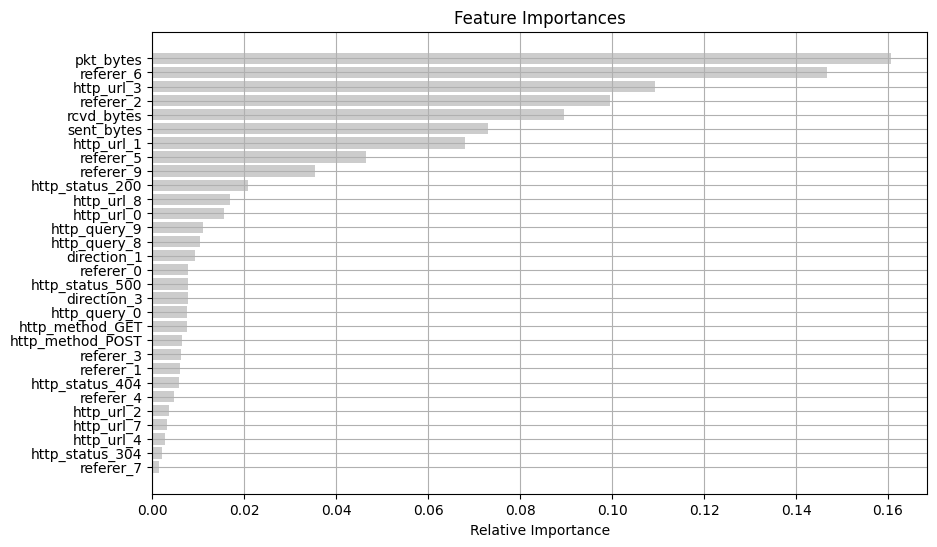

In [11]:
indices = np.argsort(importances)[-30:]
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

## confusion matrix

In [12]:
y_pred = rf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[7797,   17],
       [  32,  191]])

# Save

In [15]:
joblib.dump(rf, './model/Random Forest/RandomForest.pkl')

['./model/Random Forest/RandomForest.pkl']

# Load

In [18]:
weblog_model = joblib.load('./model/Random Forest/RandomForest.pkl')
weblog_model

RandomForestClassifier(n_estimators=250, oob_score=True, random_state=42)

In [36]:
result = weblog_model.predict([test[1]])
result

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['attack'], dtype=object)

In [37]:
result[0]

'attack'